<a href="https://colab.research.google.com/github/rijo-0309/NITTC_guraduation_research/blob/main/ADImethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#set parameters (p elements)
p = 2
D = np.array([17.5, 218.75])
L = 500.
T = 100.

a = 0.49
b = 0.5
c = 0.5
d = 0.5

#set non-linear terms expressed as vector function
def F(k, U):
  #U is p dimentional vector. F(k, U) is p-th term.
  if k == 0: return a*U[0]-b*U[1]-U[0]**3
  if k == 1: return c*U[0]-d*U[1]

#set mesh grid (2 dimention)
dx = 1.0
dt = 0.1
Ns = int(L/dx)
Nt = int(T/dt)
r = dt/(2*dx*dx)

#set initial value
U = np.random.rand(p, Nt, Ns+1, Ns+1)


#set calculation matrix (Neumann boudary condition)
A = np.zeros((p, Ns+1, Ns+1))

for k in range(p):
  A[k] = np.eye(Ns+1)*(1+2*r*D[k]) - np.eye(Ns+1, k=1)*(r*D[k])- np.eye(Ns+1, k=-1)*(r*D[k])
  A[k, 0, 0] *= 0.5
  A[k, Ns, Ns] *= 0.5

#calculate
from scipy.sparse.linalg import dsolve
for n in range(Nt-1):
  if n % 50 == 0: print(n)
  # W = U[:, n+0.5, :, :]
  W = np.zeros((p, Ns+1, Ns+1))
  for k in range(p):
    b = np.zeros(Ns+1)
    #first step
    for j in range(Ns+1):
      if j==0: b = U[k, n, :, 0] + D[k]*r*2*(U[k, n, :, 1] - U[k, n, :, 0]) + dt*0.5*F(k, U[:, n, :, 0])
      elif j==Ns: b = U[k, n, :, Ns] + D[k]*r*2*(U[k, n, :, Ns-1] - U[k, n, :, Ns]) + dt*0.5*F(k, U[:, n, :, Ns])
      else: b = U[k, n, :, j] + D[k]*r*(U[k, n, :, j+1]-2*U[k, n, :, j]+U[k, n, :, j-1]) + dt*0.5*F(k, U[:, n, :, j])
      b[0] *= 0.5
      b[Ns] *= 0.5
      W[k, :, j] = dsolve.spsolve(A[k], b)
    #second step
    for i in range(Ns+1):
      if i==0: b = W[k, 0, :] + D[k]*r*2*(W[k, 1, :] - W[k, 0, :]) + dt*0.5*F(k, W[:, 0, :])
      elif i==Ns: b = W[k, Ns, :] + D[k]*r*2*(W[k, Ns-1, :] - W[k, Ns, :]) + dt*0.5*F(k, W[:, Ns, :])
      else: b = W[k, i, :] + D[k]*r*(W[k, i+1, :] - 2*W[k, i, :] + W[k, i-1, :]) + dt*0.5*F(k, W[:, i, :])
      b[0] *= 0.5
      b[Ns] *= 0.5
      U[k, n+1, i, :] = dsolve.spsolve(A[k], b)
        

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:145: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


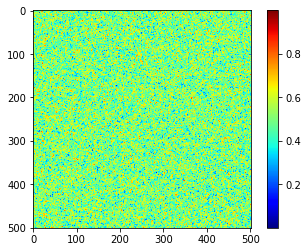

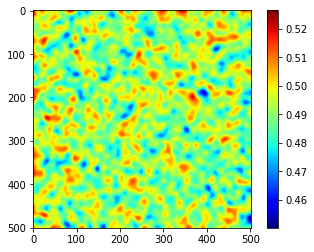

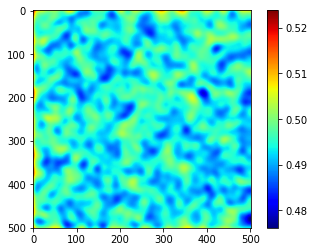

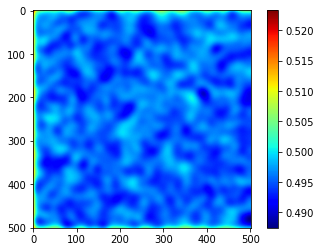

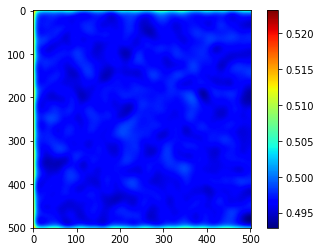

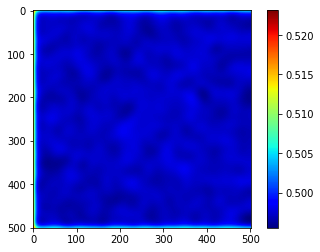

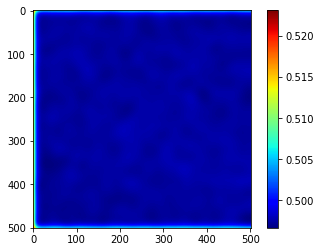

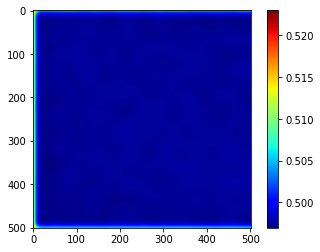

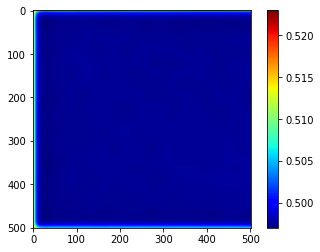

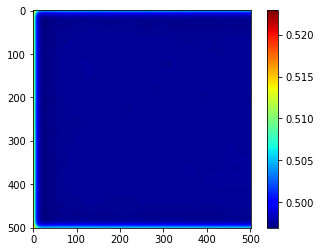

In [20]:
for k in range(100):
  if k%10 != 0: continue
  plt.figure()
  #interpolation='nearest' は無し
  data = U[0, k, :, :]
  plt.imshow(data ,vmin=data.min(), vmax=data.max() ,cmap='jet')
  plt.colorbar()
plt.show()